# Case Study 02: Housing Price

Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, seperti zona lokasi, jumlah kamar tidur, ukuran tanah, dsb.

## Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Import Data
house = pd.read_csv('train_house.csv')

In [3]:
#Liat Lima data Teratas
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Drop variabel NaN
df= house.dropna(axis=1)

In [5]:
# Memisahkan data menjadi numerikal & kategorikal
#Data Numerikal
data_numerik = df.select_dtypes(include=['int', 'float'])
#Data Kategorikal
data_kategorikal = df.select_dtypes(include=['object'])

In [6]:
data_numerik.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
data_kategorikal.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


## 1D Visualization

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

#### Variabel Kategorikal

##### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

In [8]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

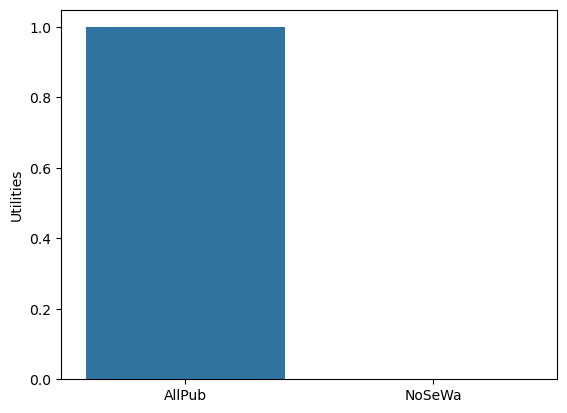

In [9]:
sns.barplot(x=data_kategorikal['Utilities'].value_counts().index,
            y=data_kategorikal['Utilities'].value_counts(normalize=True))
plt.show()

##### HouseStyle
HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

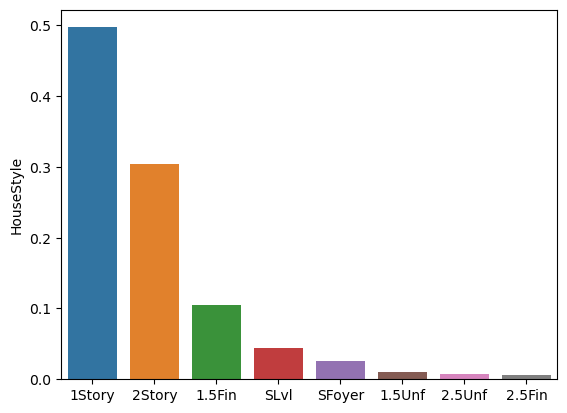

In [10]:
sns.barplot(x=data_kategorikal['HouseStyle'].value_counts().index,
            y=data_kategorikal['HouseStyle'].value_counts(normalize=True))
plt.show()

##### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

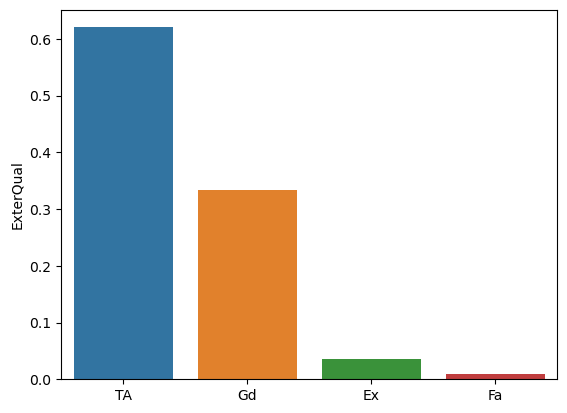

In [11]:
sns.barplot(x=data_kategorikal['ExterQual'].value_counts().index,
            y=data_kategorikal['ExterQual'].value_counts(normalize=True))
plt.show()

##### **Analisis tentang variabel kategorikal**

###### Untilites
Berdasarkan Visualisasi data varibel Untilites diketahui bahwa :
* Pada Kolom Untilites diketahui bahwa diketahui bahwa data tersebut imbalance.
* Hampir 100% properti yang dijual memiliki fasilitas yang lengkap(ALLPub)

Pertanyaan :
* apa yang menyebabkan properti yang dijual dengan Untilites NoSewa hanya sedikit bahkan hampir tidak ada?
* apakah Orang-orang lebih suka membeli properti dengan fasilitas lengkap ?

###### HouseStyle
Berdasarkan Visualisasi data variabel HouseStyle diketahui bahwa :
* Pada Kolom HouseStyle diketahuai bahwa data tersebut imbalance 
* Pada Kolom HouseStyle diketahuai bahwa jumlah properti yag dijual paling banyak adalah type 1Story denagan persentase sekitar 50% dari totl data
* Trbanyak kedua 2Story denagan persentase sekitar 30% dan terbanyak ketiga 1.5FIn denagan persentase sekitar 10% dari total data.
* Sedangkan lainnya jika ditotal sekitar 10%.

Pertayaan:
* Apa yang menyebabkan jumlah properti yang dijual dengn type 1Story lebih banyak ? 
* Apa hubungan HouseStyle degan Price ?
* Bagaimana hubungan HouseStyle dengan kualitas material ?
* Bagaimana hubungan HouseStyle dengan luas properti ?
* Apakah Orang-orang lebih suka dengan Properti tipe 1Story?

###### ExterQual
Berdasarkan Visualisasi data variabel ExterQual diketahui bahwa :
* Pada Kolom ExterQual diketahu properti yang banyak dijual adalah property yang kauliatas exterior TA sekitar 60 %.
* Kemudian yang kedua adalah property yang kualitas Gd sekitar 35%.
* Jika ditotal EX dan FA hanya sekitar 5%.

Pertanyaan :
* Kenapa Property dengan kualitas material exterior EX yang merupakan kualitas terbaik jumlah properti yang dijualnya sedikit ?
* Bagaimana hubungan ExterQual dengan harga jual ?

#### Variabel Numerikal

##### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median : 163000.0
Mean : 180921.19589041095
Std Dev : 79442.50288288663


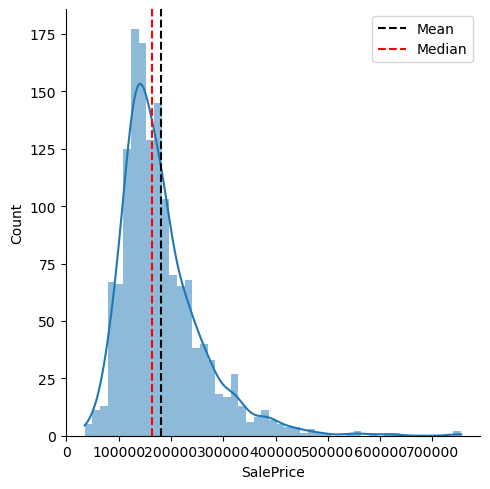

In [14]:
x = data_numerik['SalePrice']
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

###### **Analisis tentang variabel `SalePrice`**

* Distibusi *Right-skewed*
* Data banyak berada dala range 100.0000 ampai 200.000. apakah harga properti tersebut normal di daerah tersebut ?
* apa type/style properti yang berada dalam range 100.000 sampai 200.000 ?
* Tredapat beberapa nilai yang cukup jauh, yaitu `SalePrice` dengan nilai diatas 500000 apakah harga properti tersebut didaearh tersebut ? jika tidak maka perlu melakukan drop outlier.

##### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median : 1464.0
Mean : 1515.463698630137
Std Dev : 525.4803834232027


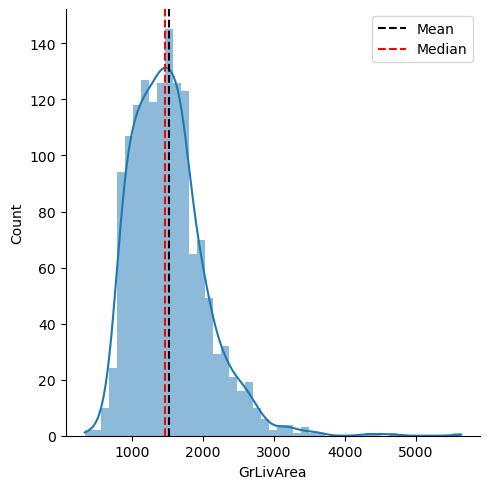

In [15]:
x = data_numerik['GrLivArea']
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

###### **Analisis tentang variabel `GrLivArea`**

* Data *right-skewed*
* Kebanyakan data berada dapa range 1000 sampai 2000.
* Bagaimana kualitas bangunan dengan luas *GrLivArea* 1000 sampai 2000 ?
* Bgaimana Hubungan antara *GrlivArea* dengan Harga Properti ?
* Kenapa banyak properti dengan *GrlivArea* 1000 sampai 2000?
* *GrlivArea* 1000 sampai 2000 kebanyakan tipe properti(Husestyle) seperti apa 

##### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median : 480.0
Mean : 472.9801369863014
Std Dev : 213.80484145338076


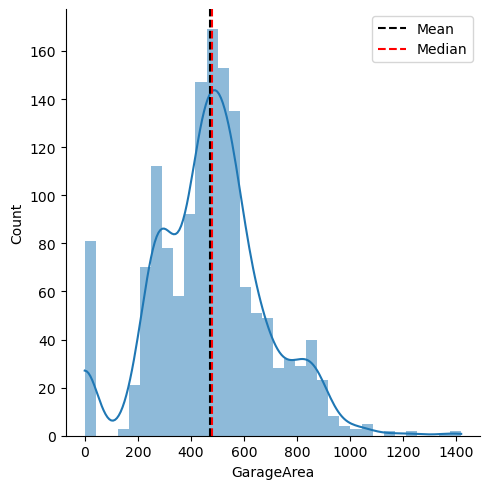

In [16]:
x = data_numerik['GarageArea']
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

###### **Analisis tentang variabel `GarageArea`**
* Data *Right-skewed*
* Terdapat banyak data 0, hal ini kemungkinan disebabkan karena tidak semua properti mempunyai garasi.
* Data banyak tersebar di 400 sampai 600. apakah orang-orang lebih menyukai garasi dengan luas tersebut ?
* Apa yang mengakibatkan data banyak tersebar di range 400 sampai 600?
* Apa hubngan `GarageArea` dengan `SalePrice` ?
* Karena terdapat banyak data 0 maka perlu melakukan analisis dengan menghilangkan data 0.

Median : 484.0
Mean : 500.76214648295866
Std Dev : 185.68051979433156


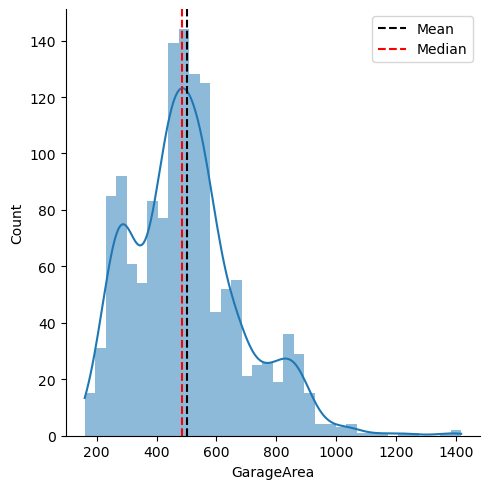

In [17]:
# Visualisasi data `GarageArea` dengan menghilangkan 0
x = data_numerik['GarageArea'][data_numerik['GarageArea'] !=0]
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

* Setelah menghilangkan nilai nol pada data persebaran data terlihal lebih baik, tetaoi data menunjukan *Right_skewed* karena terdapat bebrapa outlier

#### Pemrosesan Data Variabel Numerikal

Median : 5.212187604403958
Mean : 5.221978956475628
Std Dev : 0.17347974217176843


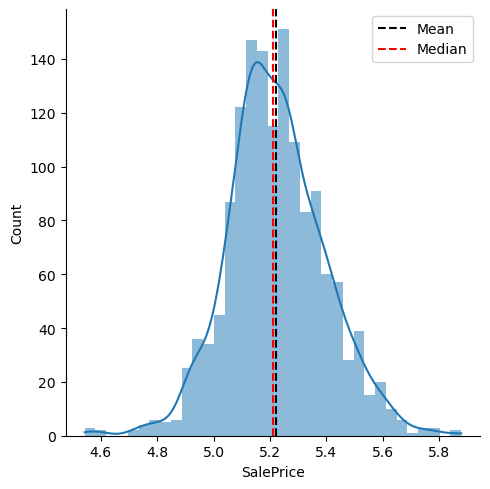

In [18]:
# Transformasi log-10 SalePrice
x = np.log10(data_numerik['SalePrice'])
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

Median : 3.165541076722373
Mean : 3.156354310389778
Std Dev : 0.14485910869663873


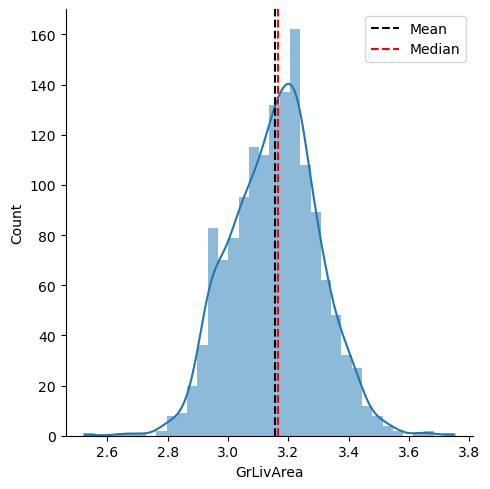

In [19]:
# Transformasi log-10 GrLivArea
x = np.log10(data_numerik['GrLivArea'])
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

Median : 2.6848453616444123
Mean : 2.6696154158200915
Std Dev : 0.16427840573730204


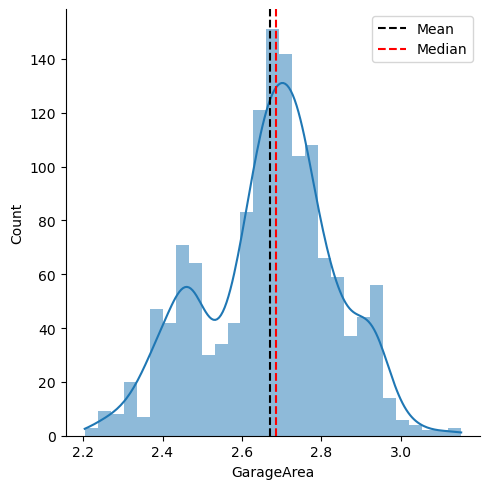

In [20]:
# Menghilangkan nilai nol pada GarageArea
x = np.log10(data_numerik['GarageArea'][data_numerik['GarageArea'] !=0])
sns.displot(x, kde=True, edgecolor='None')
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median :", x.median())
# Mean
print("Mean :", x.mean())
# Std Dev
print("Std Dev :", x.std())
plt.show()

###### **Penjelasan dan analisis tentang pemrosesan data**

* Setelah dilakukan transforamasi dengan menggunakan log-10 terlihat persebaran data lebih baik dan mendekati distribusi Normal.
* Untuk transformasi Log-10 pada variabel GarageArea masih sedikit  terlihat *Lieft-Skewed*, oleh karena itu perlu melakukan transformasi lain untuk mencari hasil terbaik.

## 2D Visualization

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

#### `GrLivArea` dengan `SalePrice`

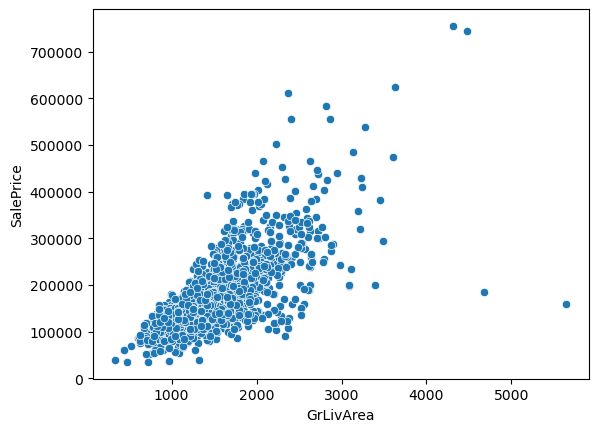

In [23]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=data_numerik)
plt.show()

#### `GarageArea` dengan `SalePrice`

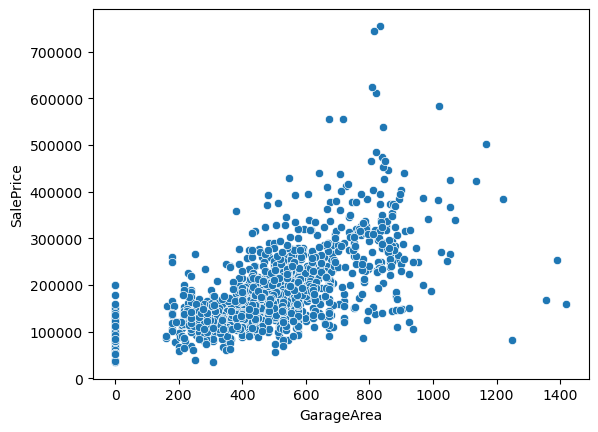

In [24]:
ax = sns.scatterplot(y="SalePrice", x="GarageArea", data=data_numerik)
plt.show()

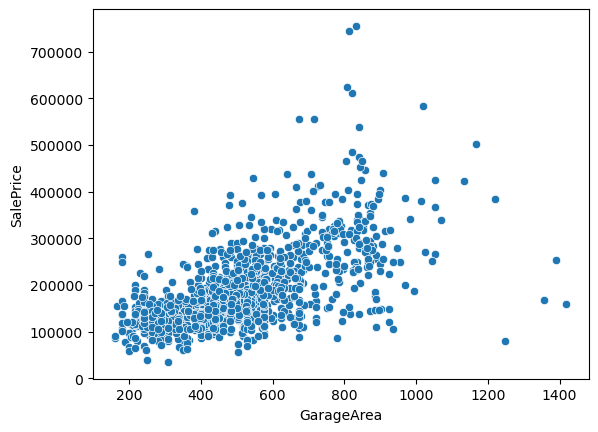

In [25]:
x = data_numerik['GarageArea'][data_numerik['GarageArea']!=0]
ax = sns.scatterplot(y="SalePrice", x=x, data=data_numerik)
plt.show()

#### **Analisa tentang hubungan antar-variabel**

###### Hubungan variabel `GrLivArea` dengan `SalePrice`
* dari visualisasi scatterplot kita dapat megetahui bahwa variabel `GrLivArea` berkorelasi positif dengan `SalePrice`
* Namun dari visualisasi dapat dilihat terdapat beberapa data yang kemungkinan merupakan anomali.
* Kemungkinan data merukapan anomali berada pada titik sebelah kanan dan yang teratas

###### Hubungan variabel `GarageArea` dengan `SalePrice`
* Dari visualisasi scatterplot terlihat terdapat banyak nilai 0 hal ini desebabkan tidak semua properti memiliki garasi.
* Oleh karena itu agar visualisasi scatterplot antara variabel `GarageArea` dengan `SalePrice` telihat lebih baik maka kita perlu menghilangkan nilai 0 tersebut.
* Dari visualisasi scatterplot kita hubungan antara variabel `GarageArea` dengan `SalePrice` sekilas terlihat berkorelasi poditif, walau tidak terlalu jelas.
* Terdapat beberapa data yang kemungkinan merupakan anomali, yaitu data yang berada pada sisi kanan bawah dan sisi atas